In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import dask.multiprocessing
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import pickle
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [0]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/master_research


/content/drive/My Drive/master_research


# Load Data
## 2.1. Opcodes

In [0]:
#load data
df_opcodes = pd.read_csv("data/interim/opcodes.csv")

In [0]:
df_opcodes = df_opcodes.iloc[:,1:]
df_opcodes.head()

,label,OPCODE-rem-float/2addr,OPCODE-rem-int/2addr,OPCODE-array-length,OPCODE-div-int/lit8,OPCODE-sub-float/2addr,OPCODE-and-int/lit8,OPCODE-and-int,OPCODE-int-to-long,OPCODE-move-wide/from16,OPCODE-mul-int/lit8,OPCODE-sparse-switch,OPCODE-return-wide,OPCODE-xor-int/lit8,OPCODE-const,OPCODE-sput-object,OPCODE-if-le,OPCODE-add-long/2addr,OPCODE-float-to-double,OPCODE-iget-boolean,OPCODE-if-lt,OPCODE-invoke-direct/range,OPCODE-neg-float,OPCODE-sub-long,OPCODE-iput,OPCODE-float-to-int,OPCODE-fill-array-data,OPCODE-xor-int,OPCODE-ushr-int/lit8,OPCODE-move-result,OPCODE-div-long/2addr,OPCODE-sput,OPCODE-new-array,OPCODE-if-gt,OPCODE-fill-array-data-payload,OPCODE-double-to-long,OPCODE-sub-double/2addr,OPCODE-if-ge,OPCODE-sput-char,OPCODE-if-gez,...,OPCODE-iget-short,OPCODE-if-lez,OPCODE-AG:invalid_instruction,OPCODE-aget-char,OPCODE-const/high16,OPCODE-rem-long,OPCODE-iput-short,OPCODE-sub-int/2addr,OPCODE-iget-char,OPCODE-move-wide/16,OPCODE-div-int/2addr,OPCODE-check-cast,OPCODE-aget,OPCODE-move/16,OPCODE-cmpl-double,OPCODE-if-gtz,OPCODE-if-ne,OPCODE-shr-int/lit8,OPCODE-xor-long/2addr,OPCODE-monitor-enter,OPCODE-int-to-double,OPCODE-shr-int,OPCODE-neg-long,OPCODE-rem-int/lit8,OPCODE-invoke-virtual,OPCODE-xor-int/2addr,OPCODE-div-float/2addr,OPCODE-rem-double/2addr,OPCODE-sget-short,OPCODE-double-to-int,OPCODE-new-instance,OPCODE-packed-switch,OPCODE-mul-int,OPCODE-shl-int,OPCODE-ushr-long/2addr,OPCODE-iget-object,OPCODE-or-int/lit16,OPCODE-const-wide,OPCODE-iput-wide,OPCODE-or-int/2addr
0,BW,3,4,674,61,38,109,10,94,45,142,185,183,2992,263,1696,133,39,29,1131,277,309,9,29,13155,209,53,0,201,10857,4,16,909,77,53,8,7,889,1,120,...,6,411,0,25,451,3,3,129,19,0,4,3154,171,0,25,136,844,28,26,350,26,0,3,8,35705,5320,43,4,0,19,7393,289,13,8,10,49439,4,45,284,1562
1,BW,2,1,143,84,39,164,26,28,32,22,44,71,20,193,374,120,5,32,874,312,154,18,15,1312,191,65,2,5,5731,0,15,338,39,65,0,1,472,0,95,...,0,269,0,5,495,3,0,171,29,0,2,1530,150,0,0,70,552,18,1,74,3,0,1,0,13235,5,32,0,0,7,2097,94,17,15,1,9363,5,28,88,64
2,BW,2,1,143,84,39,164,26,28,32,22,44,71,20,193,374,120,5,32,874,312,154,18,15,1312,191,65,2,5,5731,0,15,338,39,65,0,1,472,0,95,...,0,269,0,5,495,3,0,171,29,0,2,1530,150,0,0,70,552,18,1,74,3,0,1,0,13235,5,32,0,0,7,2097,94,17,15,1,9363,5,28,88,64
3,BW,1,0,546,33,20,73,9,40,39,123,142,131,2991,146,1281,96,23,10,852,193,243,8,24,12605,137,16,0,199,8139,0,21,668,54,16,7,5,718,0,94,...,6,321,0,1,318,3,3,75,19,0,2,2324,144,0,19,95,531,11,11,320,21,0,2,3,26073,5314,28,4,0,3,5292,238,11,7,6,45389,4,34,255,1550
4,MW,0,0,43,6,2,11,0,9,32,10,0,7,0,29,138,9,17,2,32,25,65,1,1,63,7,6,0,5,570,7,6,70,7,6,4,0,28,0,9,...,0,16,0,12,49,1,0,9,0,0,2,124,6,0,1,5,25,4,0,30,3,0,0,5,2735,1,4,0,0,1,852,7,0,0,0,1076,0,0,4,0


## 2.2. Permissions 

In [0]:
#load_data
df_permissions = pd.read_csv("data/interim/permissions.csv", )

In [0]:
df_permissions = df_permissions.iloc[:,1:]
df_permissions.head()

,label,PERMISSION-com.amazon.CONTENT_PROVIDER_ACCESS,PERMISSION-com.mducrad.taskmanagerapp.permission.C2D_MESSAGE,PERMISSION-com.mywavia.poker.android.permission.C2D_MESSAGE,PERMISSION-android.permission.INTERNET,PERMISSION-com.yandex.promolib.permission.ACCESS_START_SVC,PERMISSION-com.android.buycott.permission.C2D_MESSAGE,PERMISSION-com.triactivemedia.familytree.permission.C2D_MESSAGE,PERMISSION-air.hdandv.hashgab.permission.C2D_MESSAGE,PERMISSION-com.Settings.widget.permission.SettingsAppWidgetProvider,PERMISSION-com.ionicframework.codeartfilmnews445890.permission.C2D_MESSAGE,PERMISSION-com.paperpad.hotelGallia.permission.MAPS_RECEIVE,PERMISSION-android.permission.BIND_INPUT_METHOD,PERMISSION-com.taomi.guguyingshi.permission.JPUSH_MESSAGE,PERMISSION-com.tisc.AirQ.permission.C2D_MESSAGE,PERMISSION-com.skb.btvmobile.permission.C2D_MESSAGE,PERMISSION-com.Tobit.android.Slitte67753189071.permission.C2D_MESSAGE,PERMISSION-com.nostratech.gojek.driver.permission.C2D_MESSAGE,PERMISSION-com.bestweatherfor.bibleoffline_ru_synodal_1876.permission.C2D_MESSAGE,PERMISSION-com.android.permission.mewidget_contact,PERMISSION-net.android.apps.permission.C2D_MESSAGE,PERMISSION-com.chempakaapps.goodmorninginspirational.permission.C2D_MESSAGE,PERMISSION-com.spb.tv.am.permission.C2D_MESSAGE,PERMISSION-com.kisapps.kis.consulting.permission.C2D_MESSAGE,PERMISSION-reach.junction.funnystory.permission.JPUSH_MESSAGE,PERMISSION-hr.apps.n162568413.permission.UA_DATA,PERMISSION-com.clairs.android.permission.C2D_MESSAGE,PERMISSION-com.wNigerianMarketSpy.permission.C2D_MESSAGE,PERMISSION-com.watspoppin.watspoppin.permission.C2D_MESSAGE,PERMISSION-com.pink.permission.C2D_MESSAGE,PERMISSION-com.clickdelivery.android.domiciliosbogota.permission.C2D_MESSAGE,PERMISSION-com.rndgroup.russiangirls.release.permission.C2D_MESSAGE,PERMISSION-com.rubeacon.perchiniribaris.permission.C2D_MESSAGE,PERMISSION-com.dmeautomotive.driverconnect.burnshonda.permission.C2D_MESSAGE,PERMISSION-com.fimobile.marketusa.test.permission.MAPS_RECEIVE,PERMISSION-android.permission.SENSOR_INFO,PERMISSION-com.crescerance.HMS.permission.C2D_MESSAGE,PERMISSION-com.soln.SC71A14263F14449DB99EFBD7D75371B0.permission.MAPS_RECEIVE,PERMISSION-com.qq.AppService.permission.out.CACHE_READ_PERMISSION,PERMISSION-com.blogish.blogish.permission.C2D_MESSAGE,...,PERMISSION-com.SpaceInch.Donuts.permission.C2D_MESSAGE,PERMISSION-com.ngmoco.gamejs.permission.C2D_MESSAGE,PERMISSION-android.permission.MANAGE_ACCOUNTS,PERMISSION-com.app.appf50d719c59a3.permission.MAPS_RECEIVE,PERMISSION-android.permission.BIND_ACCESSIBILITY_SERVICE,PERMISSION-com.aptem.phoneboothv1.permission.C2D_MESSAGE,PERMISSION-com.android.ContactWidget.permission.WRITE_SETTINGS,PERMISSION-com.tencent.tin.permission.exit,PERMISSION-com.punchh.mamafus.permission.MAPS_RECEIVE,PERMISSION-com.nandi.earnfreerechargegiftcards.permission.C2D_MESSAGE,PERMISSION-com.totalloyalty.hipointpub90753.permission.C2D_MESSAGE,PERMISSION-com.thekopnews.studio.permission.C2D_MESSAGE,PERMISSION-com.google.android.apps.googlevoice.permission.SEND_SMS,PERMISSION-org.dayup.gtask.v2.permission.READ_TASKS,PERMISSION-com.ito.kone.kfm.permission.MAPS_RECEIVE,PERMISSION-com.viaviapp.recipebox.permission.C2D_MESSAGE,PERMISSION-com.aa.generaladaptiveapps.permission.C2D_MESSAGE,PERMISSION-com.mobincube.android.sc_1HMPP.permission.C2D_MESSAGE,PERMISSION-com.acixdigitalsolutions.whmcsadmin.permission.C2D_MESSAGE,PERMISSION-com.yummimedia.permission.C2D_MESSAGE,PERMISSION-android.permission.MANAGE_USERS,PERMISSION-com.wPurbleParis.permission.C2D_MESSAGE,PERMISSION-com.skipta.mobile.endocrinologistnation.permission.C2D_MESSAGE,PERMISSION-com.jamzoo.happyspace.gcm.permission.C2D_MESSAGE,PERMISSION-com.impoinfo.www.activelife.permission.C2D_MESSAGE,PERMISSION-jp.naver.lineplay.android.permission.NNI_MESSAGE,PERMISSION-com.yandex.permission.AM_COMMUNICATION,PERMISSION-me.doubledutch.nflpa.permission.C2D_MESSAGE,PERMISSION-com.mobilespy.trackanyone.permission.MAPS_RECEIVE,PERMISSIO

## 2.3. System commands

In [0]:
#load_data
df_system = pd.read_csv("data/interim/system_commands.csv")

In [0]:
df_system = df_system.iloc[:,1:]
df_system.head()

,label,SYSTEMCOMMAND-vold,SYSTEMCOMMAND-getevent,SYSTEMCOMMAND-setprop,SYSTEMCOMMAND-bugreport,SYSTEMCOMMAND-debuggerd,SYSTEMCOMMAND-sdcard,SYSTEMCOMMAND-chmod,SYSTEMCOMMAND-cd,SYSTEMCOMMAND-app_process,SYSTEMCOMMAND-system_server,SYSTEMCOMMAND-kill,SYSTEMCOMMAND-notify,SYSTEMCOMMAND-wpa_cli,SYSTEMCOMMAND-ionice,SYSTEMCOMMAND-mtpd,SYSTEMCOMMAND-dbus-daemon,SYSTEMCOMMAND-scp,SYSTEMCOMMAND-ps,SYSTEMCOMMAND-ime,SYSTEMCOMMAND-log,SYSTEMCOMMAND-service,SYSTEMCOMMAND-schedtop,SYSTEMCOMMAND-ln,SYSTEMCOMMAND-setconsole,SYSTEMCOMMAND-top,SYSTEMCOMMAND-mkdir,SYSTEMCOMMAND-start,SYSTEMCOMMAND-ls,SYSTEMCOMMAND-procrank,SYSTEMCOMMAND-servicemanager,SYSTEMCOMMAND-input,SYSTEMCOMMAND-tc,SYSTEMCOMMAND-pm,SYSTEMCOMMAND-iptables,SYSTEMCOMMAND-sudo,SYSTEMCOMMAND-logcat,SYSTEMCOMMAND-dumpsys,SYSTEMCOMMAND-df,SYSTEMCOMMAND-dd,...,SYSTEMCOMMAND-sync,SYSTEMCOMMAND-ifconfig,SYSTEMCOMMAND-showmap,SYSTEMCOMMAND-surfaceflinger,SYSTEMCOMMAND-su,SYSTEMCOMMAND-lsmod,SYSTEMCOMMAND-netcfg,SYSTEMCOMMAND-id,SYSTEMCOMMAND-keystore,SYSTEMCOMMAND-uptime,SYSTEMCOMMAND-aplay,SYSTEMCOMMAND-ping,SYSTEMCOMMAND-reboot,SYSTEMCOMMAND-vmstat,SYSTEMCOMMAND-rmdir,SYSTEMCOMMAND-sqlite3,SYSTEMCOMMAND-smd,SYSTEMCOMMAND-insmod,SYSTEMCOMMAND-bootanimation,SYSTEMCOMMAND-printenv,SYSTEMCOMMAND-netstat,SYSTEMCOMMAND-ioctl,SYSTEMCOMMAND-dalvikvm,SYSTEMCOMMAND-date,SYSTEMCOMMAND-monkey,SYSTEMCOMMAND-racoon,SYSTEMCOMMAND-dmesg,SYSTEMCOMMAND-dexdump,SYSTEMCOMMAND-sendevent,SYSTEMCOMMAND-ndc,SYSTEMCOMMAND-svc,SYSTEMCOMMAND-run-as,SYSTEMCOMMAND-stagefright,SYSTEMCOMMAND-chown,SYSTEMCOMMAND-sh,SYSTEMCOMMAND-mediaserver,SYSTEMCOMMAND-gzip,SYSTEMCOMMAND-dexopt,SYSTEMCOMMAND-lsof,SYSTEMCOMMAND-nandread
0,BW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,124,0,0,0,4,0,2,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,BW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,MW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0


## 2.4. Receivers

In [0]:
# load data
df_receivers = pd.read_csv("data/interim/intent_receivers.csv")
df_receivers = df_receivers.iloc[:,1:]

In [0]:
df_receivers.head()

,label,RECEIVER-,RECEIVER-it.samira.mylib.receivers.AudioPlayerReceiver_CONTROL,RECEIVER-com.igexin.sdk.action.cIRZ7PvDXY8zqOgEZSBGm1,RECEIVER-com.mobisleapps.maybe.like.description,RECEIVER-com.sec.everglades.main.update_for_widget,RECEIVER-org.mozilla.webapp.TASK_REMOVED,RECEIVER-action_show_10km,RECEIVER-com.cn21.android.pushservice.action.MESSAGE,RECEIVER-com.ganji.android.action.START_ALARM,RECEIVER-com.silentcom.osutils.ALARM_ALERT,RECEIVER-android.intent.action.MEDIA_BAD_REMOVAL,RECEIVER-ru.android.apps.CHECK,RECEIVER-valentia.wcgems.mdt.stopscanning,RECEIVER-com.ihope.bestwealth.intent.action.COMMAND,RECEIVER-com.android.daemon.cppo.main.req,RECEIVER-ACTION_DELETE_NOTIFICATION,RECEIVER-android.search.action.SETTINGS_CHANGED,RECEIVER-com.aviramido.pinger.START_ALARM,RECEIVER-android.action.removeremind.five.minute,RECEIVER-com.ijinshan.kbatterydoctor.receiver.ACTION_AUTODOWNLOAD,RECEIVER-im.momo.service.pushable.IMomoCommand,RECEIVER-com.baidu.waimai.tweak.action.TWEAK_REQUEST,RECEIVER-com.moblynx.clockl.worldclock.update,RECEIVER-monitor.action.dump.traceview,RECEIVER-it.webxperience.mystocks.STOCK_PORTFOLIO_CHANGED,RECEIVER-com.ecount.erp.barcode.purchase.response.check.serial.no,RECEIVER-com.digby.localpoint.AttributesUpdateSuccess,RECEIVER-com.igexin.sdk.action.YtXLYM3ONo6YfHRkxmyFq6,RECEIVER-com.skt.prod.dialer.TPHONE_UPDATE_COMPLETE,RECEIVER-com.cloudmagic.mail.observers.GCM_NOTIFICATION_OPEN_PREVIEW,RECEIVER-ibuluo.intent.action.BOOT_ALARM,RECEIVER-com.sonyericsson.extras.aef.control.STOP,RECEIVER-com.ubikod.capptain.reach.intent.action.EXIT_NOTIFICATION,RECEIVER-com.borqs.mydroid.intent.ACTION_CHECK_PLUGIN_VERSION,RECEIVER-2345action_news_view_jump,RECEIVER-com.kms.ipm.message_removed,RECEIVER-com.fyangsc.market.intent.action.COMMAND,RECEIVER-rpa.com.excelliance.kxqp.platform.gameplugin2.ReceiverProxy_SP_B,RECEIVER-LAST,...,RECEIVER-rpa.com.excelliance.kxqp.platform.gameplugin.ReceiverProxy_SP_A,RECEIVER-rpa.com.excelliance.kxqp.platform.gameplugin.ReceiverProxy_SP_B,RECEIVER-rpa.com.excelliance.kxqp.platform.gameplugin.ReceiverProxy_SP_C,RECEIVER-note.socialnmobile.intent.action.AUTO_SYNC,RECEIVER-com.taviferapps.randomplayer.widgetinfo,RECEIVER-com.yoloho.dayima.service.advert.action,RECEIVER-com.wikia.singlewikia.shadowofmordor.intent.action.ACTION_OPEN_LOCAL_NOTIFICATION,RECEIVER-com.eclips.REPEATING_UI_UPDATE,RECEIVER-de.ip_symcon.www.haussteuerung.imageButtonWidgetVoiceLock,RECEIVER-com.attictv.notification.ACTION_SAVE,RECEIVER-com.chunfen.brand5.action.LOCAL_PUSH,RECEIVER-com.danhuaer.app.dhertool.intent.action.COMMAND,RECEIVER-org.kman.AquaMail.ACTION_SYSTEM_SETTINGS,RECEIVER-com.foresight.mobonews.umengpush.CleanPushIconReceiver,RECEIVER-com.mqunar.atom.push.notify,RECEIVER-update_daylife_message,RECEIVER-com.maidrobot.connect.ClientService.MESSAGEACT,RECEIVER-com.popularapp.periodcalendar.alert_notification,RECEIVER-com.garena.android.gpns.ALARM_ACTION10023,RECEIVER-com.appall.optimizationbox.SOUND,RECEIVER-sos_send_message,RECEIVER-cn.intimes.nvhaixiu.startup,RECEIVER-ACTION_NOTIFICATION_SERVICE,RECEIVER-lkgtffgm.fmsoaogww.RSNotification,RECEIVER-com.mariussoft.endlessjabber.action.extend,RECEIVER-com.calldorado.android.intent.PRIORITYREQUEST,RECEIVER-com.payneservices.reminder.REPEATING_ALARM,RECEIVER-ru.justreader.beta.prefix.Sync,RECEIVER-phoenix.intent.action.DOWNLOAD_OPEN,RECEIVER-com.huawei.android.push.intent.RECEIVE,RECEIVER-com.android.vending.INSTALL_REFERRER,RECEIVER-com.jb.gosms.im.IM_NEW_MESSAGE,RECEIVER-com.garena.android.gpns.NOTIFICATION_RECEIVE,RECEIVER-com.mymoney.sms.action.GET_CACHE_DATA_REMIND,RECEIVER-com.colormar.colorWeatherxdfghjwfwfghj.appWidget.ACTION_SHOW_MORE,RECEIVER-com.syezon.action.ADJUST_ORDER,RECEIVER-cn.jpush.android.intent.UNREGISTRATION,RECEIVER-com.appbyme.app64872.forum.service.heart.beat.notify,RECEIVER-com.optaim.zyzservice.SETUP,RECEIVER-android.intent.action.SEND_MESSAGE
0,BW,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0

In [0]:
#split dataframe to benign apks and malware apks
df_bw_receivers = df_receivers[df_receivers["label"] == ''"BW"]
df_mw_receivers = df_receivers[df_receivers["label"] == "MW"]

## 2.5. Services

In [0]:
#load data
df_services = pd.read_csv("data/interim/intent_services.csv")
df_services = df_services.iloc[:, 1:]

In [0]:
df_services.head()

,label,SERVICE-,SERVICE-com.editorinc.greetingcards.getwellsoon.modules.podcast.download.ACTION_STOP_DOWNLOADS,SERVICE-com.guide.flippywheelsguide.modules.podcast.player.ACTION_TOGGLE_PLAY,SERVICE-com.skb.btvmobile.popuplayservice.UI_SHOW_RESIZEBTN,SERVICE-com.borya.cclingtoneconcall.action.START_CCS_SERVICE,SERVICE-cn.mchina.haokan.action.user_sign_in,SERVICE-android.service.dreams.DreamService,SERVICE-de.bright_side.brightsound.service.action.NEXT,SERVICE-com.baidu.android.pushservice.action.PUSH_SERVICE,SERVICE-com.popularapp.periodcalendar.NotificationPillService,SERVICE-com.secretlisa.shamisisleep.action.MUSIC_PLAY,SERVICE-com.qihoo360.transfer.sms.cancel.default.smsreceive,SERVICE-com.qunar.qchat.corp.ops.amd.STOP_AMD,SERVICE-com.wanplusstore.recipeeggs.cookingbook.modules.podcast.player.ACTION_STOP,SERVICE-com.thebhwgroup.android.musicplayer.action.PAUSE,SERVICE-com.senddroid.AdServicecom.game.cheats.guide.monopoly.millionaire,SERVICE-com.ccciit.cscanner.modules.podcast.player.ACTION_PLAY,SERVICE-com.frames.newyearandchristmasframes.photoframes.modules.podcast.player.ACTION_SET_URL,SERVICE-com.faapps.abo_rayan.audio.action.PAUSE,SERVICE-com.dareyan.eve.intent.action.START,SERVICE-android.nfc.cardemulation.action.HOST_APDU_SERVICE,SERVICE-com.apsima.demoapp.ACTION_UNREGISTER_ALL_GEOFENCES,SERVICE-li.yahphxbdal.yui.af4c359b8.df06a7126.YOZGHYJYZKBYMW,SERVICE-com.wsm.rtwealth.service.appstatusservice,SERVICE-com.jrd.loan.intent.action.COCKROACH,SERVICE-com.appsmovil.lasmejoresfrasescomicas.modules.podcast.player.ACTION_FAST_FORWARD,SERVICE-o.a.download.goon.com.mobi.screensaver.yqns,SERVICE-com.ad.com.cn.AdService,SERVICE-com.senddroid.AdServicecom.androidpeople.tab.freeplayer,SERVICE-cn.mama.UPDATE_SERVICE,SERVICE-com.kk.dict.intent.action.COCKROACH,SERVICE-com.aceant.beautiful.live.flowers.modules.podcast.download.ACTION_STOP_DOWNLOADS,SERVICE-dtxto.action.notification.update,SERVICE-MediaPlayerService.ACTION_STOP,SERVICE-app.theme.code.html.breakingdawn.ACTION_WLzmdQoBiQQ,SERVICE-com.lhyy.chilrenfishingproone.intent.action.COCKROACH,SERVICE-com.game37.kl.PUSH_ACTION,SERVICE-com.airpush.android.PushServiceStart40328,SERVICE-com.aceant.beautiful.live.flowers.modules.podcast.player.ACTION_SET_URL,...,SERVICE-ren.jun.suo.qiu.intent.action.COCKROACH,SERVICE-ing.galgaev.quran.service.declamationDownload_Service,SERVICE-android.intent.action.VIEW,SERVICE-com.google.android.apps.wallet.services.geofencing.STOP_GEOFENCING_NOTIFICATION,SERVICE-fr.educaapps.WolfSounds.soundboard.action.REWIND,SERVICE-jp.naver.line.android.access.remote.action.WEARABLE_SEND_MESSAGE_ACTION,SERVICE-com.szst.hgzrt.PUSH_ACTION,SERVICE-app.theme.retreating.figure.passionatesurfing.ACTION_UltOgagklIZ,SERVICE-com.service.NEW2,SERVICE-jp.naver.line.android.access.remote.action.CONNECT,SERVICE-com.andromo.dev242329.app225868.AudioCache.action.START,SERVICE-com.server.NetworkService.CONNECT,SERVICE-com.zz.schedule.AlarmService,SERVICE-com.carlos.stock.view.widget.APP_WIDGET_PREV,SERVICE-id.jujihu.prideandprejudiceebook.modules.podcast.download.ACTION_STOP_DOWNLOADS,SERVICE-com.uapush.android.intent.UNREGISTER,SERVICE-nc.yroazmviflor.uwzx.n4e1a777e02.j7f20f7.HVSQPKZGOVIW,SERVICE-cn.egame.terminal.sdk.SERVICE_CMD,SERVICE-com.airpush.android.PushServiceStart29685,SERVICE-com.hoolai.magic.service.AutoLocationService,SERVICE-com.senddroid.AdServicepl.infinzmedia.raindropfree,SERVICE-cn.ledongli.ldl.action_merge_data,SERVICE-com.pyd1dailyyogaroutineforwomen.modules.podcast.player.ACTION_TOGGLE_PLAY,SERVICE-com.expressitusa.app.modules.podcast.download.ACTION_STOP_DOWNLOADS,SERVICE-com.android.daowaymerchant.intent.action.START,SERVICE-com.sohu.uploadservice,SERVICE-com.solomo.starlet.modules.podcast.player.ACTION_PLAY,SERVICE-com.sonyericsson.extras.liveware.aef.tunnel.action.BIND,SERVICE-org.aclu.mobile.justice.mi.ExternalReceiver,SERVICE-com.tixa.sichuanhuamu.services.LOADING_TIMER_SERVICE,SERVICE-com.andromo.dev64620.app254035.soundboard.action.SKIP,SERVICE-com.

## 2.6. Activities

In [0]:
#load data
df_activities = pd.read_csv("data/interim/intent_activities.csv")
df_activities = df_activities.iloc[:, 1:]

In [0]:
df_activities.head()

,label,ACTIVITY-,ACTIVITY-com.hanmiOnlinePharm.sfa.ui.threecall.VisitCallProgressActivity,ACTIVITY-android.intent.action.mamafu.INTERMEDIATE,ACTIVITY-com.fusepowered.fuseactivities.FuseApiMoregamesBrowser,ACTIVITY-io.rong.voipkit.calledSideActivity.action,ACTIVITY-android.intent.action.Run,ACTIVITY-com.quizmine.androidnutrition.tutorialActivity_slab,ACTIVITY-seven.client.ntr.android.QR.SCAN,ACTIVITY-com.experlabs.timepass.PREFS,ACTIVITY-qgl_seoul.ACTION_MULTIPLE_PICK,ACTIVITY-com.ECO.cumamesa.QQ,ACTIVITY-com.bodybuildinglifestyle.workouts.chest.DUMBELLINCLINEPRESS,ACTIVITY-com.quizmine.sixgradecommoncoremath.howToUseActivity_slab,ACTIVITY-android.intent.action.english_topics,ACTIVITY-com.motorola.msp.client.USERATTRIBUTE_DIALOG,ACTIVITY-com.android.contacts.action.LIST_FREQUENT,ACTIVITY-com.baidu.browser.apps.BrowserActivity.TestPageLoad,ACTIVITY-android.intent.action.MAIN_VEL,ACTIVITY-com.quizmine.androidnutrition.Welcome_activity_slab,ACTIVITY-ring_v1.view.ACTION_MULTIPLE_PICK,ACTIVITY-com.adi.aplikasimobilebasisdata.EditDataJurusan,ACTIVITY-android.support.PARENT_ACTIVITY,ACTIVITY-io.appery.project309504.MESSAGE,ACTIVITY-com.galaxybuilders.projectupdate.MESSAGE,ACTIVITY-android.intent.action.SlidingImageActivity,ACTIVITY-wifi.intent.action.TRAFFIC_STATISTICS,ACTIVITY-com.pushbullet.android.VIEW_CHANNELS,ACTIVITY-com.tf.intent.action.CHOOSE_EMAIL,ACTIVITY-android.intent.action.PROCESS_TEXT,ACTIVITY-com.baidu.searchbox.action.SEARCHCOMBINE_BARCODE,ACTIVITY-com.elves.sister.receivemessage,ACTIVITY-com.hisun.phone.intent.HisunIntent.ACTION_GET_FREE_POINT,ACTIVITY-com.iloen.melon.intent.action.download.mv,ACTIVITY-ir.amouzeshhaye.maharthaye.zanashouei.VideoPlayer,ACTIVITY-net.phonex.phone.action.CONTACT_LIST,ACTIVITY-com.orietech.zhang.activity.MoreActivity,ACTIVITY-fjOpenBusinessSelectCityActivity,ACTIVITY-com.voice.demo.voip.CCP_ACTION_VIDEO_INTCALL,ACTIVITY-com.netease.caipiao.intent.action.EXTERNAL_LAUNCH,...,ACTIVITY-com.paninikeypad.punjabi.CONJUNCTS,ACTIVITY-com.appbyme.app48440.com.define.appbyme.SlidingHomeActivity,ACTIVITY-com.paninikeypad.punjabi.ABOUTUSCONTENTACTIVITY,ACTIVITY-android.intent.action.WORDS_LIST_UNKNOWN,ACTIVITY-com.dark.util.Dialog1_3Activity,ACTIVITY-android.fbreader.action.EXTERNAL_INTERNAL_LIBRARY,ACTIVITY-com.visitxm.ui.introduction.IntroductionActivity,ACTIVITY-com.quizmine.sixgradecommoncoremath.workbookActivity_slab,ACTIVITY-com.outplayentertainment.kakao.KAKAO_MESSAGE,ACTIVITY-com.hitwicketapps.cricket.intent.action.ACTION_VIEW_TWITTER,ACTIVITY-comm.cchong.measure.heartrate.HeartRateFailedActivity,ACTIVITY-cn.com.mhealth.activities.right.first.ListOperationMenuActivity,ACTIVITY-com.antutu.benchmark.full.MAROONED_RUN,ACTIVITY-com.android.chrome.ADDBOOKMARK,ACTIVITY-com.good.gd.intent.action.ACTION_ICC_COMMAND,ACTIVITY-com.bubu.steps,ACTIVITY-com.voice.assistant.SET_SKIN,ACTIVITY-com.yydys.main,ACTIVITY-wallet.intent.action.BINDJD,ACTIVITY-banksmart_globalime_change_txn_password,ACTIVITY-com.adi.aplikasimobilebasisdata.LihatDataSk,ACTIVITY-togic.intent.action.WEB,ACTIVITY-com.zuobao.tata.usershow,ACTIVITY-com.lguplus.mobileopenning.LAUNCH_FROM_MD_MADANG,ACTIVITY-ir.amouzeshhaye.maharthaye.zanashouei.RssActivity,ACTIVITY-com.iflytek.inputmethod.action_ime,ACTIVITY-com.bodybuildinglifestyle.workouts.shoulder.LATERALRAISE,ACTIVITY-android.intent.action.SCANCARDBACK,ACTIVITY-com.adi.aplikasimobilebasisdata.LihatDataCari,ACTIVITY-com.vivo.browser.AUTHENTICATION,ACTIVITY-com.sonyericsson.extras.liveware.SHOW_CUSTOMIZED_MSG,ACTIVITY-com.myingzhijia.CustomApplyServiceActivity,ACTIVITY-k.microcells.running.GameActivity,ACTIVITY-com.quizmine.thirdrdgradeccmath.howToUseVideoActivity,ACTIVITY-com.meituan.android.intent.action.address_edit_meituan_activity,ACTIVITY-android.intent.action.cpsl.checkoutuld,ACTIVITY-action.cidian.search,ACTIVITY-com.kukool.iphonestock.activity.AddCity,ACTIVITY-mituo.plat.intent.action.ADS.NOTIFIER.CLICKED,ACTIVITY-com.fresvii.chickenballoon.NotificationAction
0,BW,0,0,0,0,0,0,0,0

## 2.7. API calls

In [0]:
#load data
df_api_calls = pd.read_csv("data/interim/api_calls.csv")
df_api_calls = df_api_calls.iloc[:,1:]
df_api_calls.head()
df_api_calls.describe()

,APICALL-java.security.cert.Certificate,APICALL-android.view.SubMenu,APICALL-android.media.audiofx.Virtualizer,APICALL-android.support.v7.widget.helper.ItemTouchHelper,APICALL-android.net.RouteInfo,APICALL-android.bluetooth.BluetoothGattCallback,APICALL-android.support.percent.PercentLayoutHelper,APICALL-android.print.PageRange,APICALL-java.net.InterfaceAddress,APICALL-android.support.v7.widget.DividerItemDecoration,APICALL-android.support.v4.text.TextUtilsCompat,APICALL-android.support.v17.leanback.app.DetailsFragment,APICALL-android.app.Activity,APICALL-java.security.cert.LDAPCertStoreParameters,APICALL-android.support.v4.view.Menu,APICALL-android.widget.ResourceCursorTreeAdapter,APICALL-android.media.MediaActionSound,APICALL-javax.net.ssl.SSLSocket,APICALL-android.support.v8.renderscript.ScriptC,APICALL-android.database.ContentObservable,APICALL-android.nfc.NfcAdapter,APICALL-javax.net.ssl.X509ExtendedTrustManager,APICALL-android.gesture.GestureOverlayView,APICALL-android.view.ScaleGestureDetector,APICALL-android.service.dreams.DreamService,APICALL-android.gesture,APICALL-android.support.v4.view.ViewPropertyAnimatorListenerAdapter,APICALL-java.net.SocketTimeoutException,APICALL-java.util.Arrays,APICALL-javax.net.ssl.HandshakeCompletedEvent,APICALL-android.telephony.SubscriptionManager,APICALL-java.lang.VirtualMachineError,APICALL-android.support.v7.widget.AppCompatEditText,APICALL-java.security.cert.CertificateEncodingException,APICALL-java.security.cert.CertificateException,APICALL-android.preference.EditTextPreference,APICALL-android.util.SparseLongArray,APICALL-java.io.StreamCorruptedException,APICALL-android.support.v7.util.ListUpdateCallback,APICALL-android.widget.VideoView,...,APICALL-java.security.MessageDigest,APICALL-javax.xml.datatype.XMLGregorianCalendar,APICALL-javax.xml.parsers,APICALL-android.net.wifi.WifiManager,APICALL-java.io.OutputStream,APICALL-android.os.Parcelable,APICALL-android.transition.Visibility,APICALL-android.database,APICALL-android.webkit.DateSorter,APICALL-java.nio.file.attribute.BasicFileAttributes,APICALL-java.text.CharacterIterator,APICALL-android.app.backup.BackupManager,APICALL-android.widget.Button,APICALL-java.io.StringReader,APICALL-android.drm.DrmManagerClient,APICALL-org.json.JSONObject,APICALL-android.app.assist.AssistContent,APICALL-java.io.DataOutput,APICALL-org.apache.http.conn.scheme.LayeredSocketFactory,APICALL-java.net.ConnectException,APICALL-android.support.v17.leanback.widget.SpeechOrbView,APICALL-android.media.AsyncPlayer,APICALL-android.text.style.SuggestionSpan,APICALL-android.service.dreams,APICALL-android.os.PatternMatcher,APICALL-android.support.v4.view.MenuItem,APICALL-java.time.chrono.ChronoLocalDate,APICALL-android.app.ActivityGroup,APICALL-android.support.v7.widget.RecyclerViewAccessibilityDelegate,APICALL-android.webkit.WebHistoryItem,APICALL-android.speech,APICALL-android.content.ClipDescription,APICALL-android.support.v4.view.accessibility.AccessibilityManagerCompat,APICALL-java.net.InetAddress,APICALL-android.support.multidex.MultiDexApplication,APICALL-android.widget.MediaController,APICALL-android.support.v4.widget.ExploreByTouchHelper,APICALL-android.content.ContentResolver,APICALL-org.xmlpull.v1.XmlPullParser,APICALL-org.xml.sax.ext.DeclHandler
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.0,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,...,22000.000000,22000.000000,22000.0,22000.000000,22000.000000,22000.000000,22000.000000,22000.0,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22

# TODO: 3. Feature Engineering

# 4. Preprocessing data

In [0]:
print(feature_names[0])

activities


### Save preprocessed data

In [0]:
for i, feature in enumerate(tqdm(feature_list)):
    df_train, df_test = train_test_split(feature, test_size=None, train_size=0.7, random_state = 3)

    df_train = pd.get_dummies(df_train, columns=["label"], drop_first=True, prefix='', prefix_sep='')
    df_test = pd.get_dummies(df_test, columns=["label"], drop_first=True, prefix='', prefix_sep='')
    
    print("Saving "+feature_names[i]+" feature ...")
    df_train_sc.to_csv('../data/processed/test/train_'+ feature_names[i]+'_sc.csv', index=False)
    df_test_sc.to_csv('../data/processed/test/test_'+ feature_names[i]+'_sc.csv', index=False)

    df_train.to_csv("../data/processed/test/train_"+ feature_names[i]+".csv", index=False)
    df_test.to_csv("../data/processed/test/test_"+ feature_names[i]+".csv", index=False)
    print(feature_names[i] +" saved.")
    

Saving activities feature ...
activities saved.
Saving api_calls feature ...
api_calls saved.
Saving opcodes feature ...
opcodes saved.
Saving permissions feature ...
permissions saved.
Saving receivers feature ...
receivers saved.
Saving services feature ...
services saved.
Saving system feature ...
system saved.


### Load preprocessed data

In [0]:
#feature_list = [df_activities, df_api_calls, df_opcodes, df_permissions, df_receivers, df_services, df_system]
feature_names = ["activities", "api_calls", "opcodes", "permissions", "receivers", "services", "system"]


In [0]:
def load_feature(feature):
    
    print("Loading "+feature +" features ...")
    train_df = pd.read_csv("data/processed/train_"+ feature+".csv")
    test_df = pd.read_csv("data/processed/test_"+ feature+".csv")
    print(feature +" loaded.")
    
    return train_df, test_df

In [0]:
df_train[0]

,0,1,2,3,4,5,6,7,8,9,...,6079,6080,6081,6082,6083,6084,6085,6086,6087,6088
0,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6597,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6598,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6599,0.0,0.0,0.0,-0.021323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_train = df_test = df_train_sc = df_test_sc = [None]*len(feature_names)
X = y = X_sc = y_sc = X_test = X_test_sc = [None]*len(feature_names)

In [0]:
for i, feature in enumerate(tqdm(feature_names)):
    df_train[i], df_test[i] = load_feature(feature)
    df_1 = df_train[i] # Cannot use df_train[i].drop() -> "MW not found" in axis
    df_2 = df_test[i]
    scaler = StandardScaler()
    scaler.fit(df_1.drop(['MW'], axis=1))
    scaled_features = scaler.transform(df_1.drop(['MW'],axis=1))
    df_train_sc[i] = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])

    scaled_features = scaler.transform(df_2.drop(['MW'],axis=1))
    df_test_sc[i] = pd.DataFrame(scaled_features) # , columns=df_test_ml.columns)

    X[i] = df_1.drop('MW', axis=1)
    y[i] = df_1["MW"]
    X_test[i] = df_2

    X_sc[i] = df_train_sc[i]
    y_sc[i] = df_1['MW']
    X_test_sc[i] = df_test_sc[i]

  0%|          | 0/7 [00:00<?, ?it/s]

Loading activities features ...
activities loaded.


 14%|█▍        | 1/7 [00:18<01:51, 18.63s/it]

Loading api_calls features ...
api_calls loaded.


 29%|██▊       | 2/7 [00:24<01:13, 14.76s/it]

Loading opcodes features ...


 43%|████▎     | 3/7 [00:25<00:43, 10.80s/it]

opcodes loaded.
Loading permissions features ...
permissions loaded.


 57%|█████▋    | 4/7 [00:43<00:38, 12.77s/it]

Loading receivers features ...
receivers loaded.


 71%|███████▏  | 5/7 [01:03<00:29, 14.93s/it]

Loading services features ...
services loaded.


 86%|████████▌ | 6/7 [01:17<00:14, 14.72s/it]

Loading system features ...


100%|██████████| 7/7 [01:18<00:00, 10.64s/it]

system loaded.


In [0]:
y[1]

,0,1,2,3,4,5,6,7,8,9,...,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127
0,-0.141182,1.495765,-0.028477,4.312716,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,1.482073,1.004563,-0.448977,-0.107244,-0.343273,1.286608,0.023390,-0.165762,-0.102778
1,-0.141182,-0.579090,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,-0.660304,-0.833161,-0.325495,-0.107244,-0.129706,-0.833834,1.132093,-0.319503,-0.102778
2,-0.141182,-0.579090,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,1.482073,1.004563,-0.448977,-0.107244,-0.343273,1.154081,-0.370021,-0.330484,-0.102778
3,-0.141182,-0.579090,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,-0.660304,-0.833161,-0.448977,-0.107244,-0.343273,-0.833834,-0.441550,-0.330484,-0.102778
4,-0.141182,4.262238,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,1.482073,1.004563,-0.325495,-0.107244,-0.343273,1.154081,-0.012375,-0.330484,-0.102778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,-0.141182,0.112528,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,-0.660304,-0.833161,-0.202013,-0.107244,-0.343273,-0.833834,-0.370021,-0.330484,-0.102778
6597,-0.141182,-0.579090,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,-0.660304,-0.220586,-0.448977,-0.107244,-0.343273,-0.833834,-0.298492,-0.330484,-0.102778
6598,-0.141182,-0.579090,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,-0.660304,-0.833161,0.044952,-0.107244,-0.343273,-0.833834,-0.405786,0.372331,9.729680
6599,-0.141182,-0.579090,-0.028477,-0.233305,-0.02037,-0.018667,-0.055056,-0.017108,-0.034757,-0.024624,...,0.0,-0.660304,-0.833161,-0.448977,-0.107244,-0.129706,-0.833834,-0.441550,-0.330484,-0.102778


#### Train models for each feature

In [0]:
gsRFC = [None]*len(feature_names)
RFC_best = [None]*len(feature_names)

for i in range(len(X_sc)):
    cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )

    # RFC Parameters tunning 

    RFC = RandomForestClassifier()


    ## Search grid for optimal parameters
    rf_param_grid = {"max_depth": [None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [False],
                  "n_estimators" :[100,300],
                  "criterion": ["gini"]}



    gsRFC[i] = GridSearchCV(RFC,param_grid = rf_param_grid, cv=cross_validation_split, scoring="accuracy", n_jobs= 12, verbose = 10)

    gsRFC[i].fit(X_sc[i],df_1['MW'])

    RFC_best[i] = gsRFC[i].best_estimator_

    # Best score
    gsRFC[i].best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   24.7s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   46.8s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  5.5min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   13.3s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   18.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   25.4s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   29.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   36.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   38.8s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   41.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:   43.4s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   45.8s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   47.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   49.6s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   52.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   56.5s
[Parallel(

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   17.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   21.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   27.4s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:   32.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   36.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   39.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   42.3s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   46.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   51.3s
[Parallel(

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   34.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:  7.3min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  7.3min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:  7.4min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  8.1min
[Parallel(

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   28.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   54.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:  6.3min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  6.8min
[Parallel(

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   20.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   36.8s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:  4.5min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:  4.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    8.3s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   18.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   22.4s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   24.1s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   25.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:   27.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   28.3s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   29.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   30.6s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   32.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   34.7s
[Parallel(

In [0]:
gsLGB = [None]*len(feature_names)
gsLGB_best = [None]*len(feature_names)

for i in range(len(X)):
    cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
    n_estimators=list(range(100,1100,100))
    learn_rate=[0.01,0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
    print(feature_names[i])
    
    hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
    gsLGB[i]=GridSearchCV(estimator=lgb.LGBMClassifier(),param_grid=hyper,verbose=True,n_jobs = 8, cv=cross_validation_split)
    gsLGB[i].fit(X[i],df_1['MW'])
    
    gsLGB_best[i] = gsLGB[i].best_estimator_
    print(gsLGB[i].best_score_)

activities
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   45.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 14.2min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 22.3min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 23.4min finished


0.509439676930843
api_calls
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/home/cristiankamia/anaconda3/envs/research_py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 26.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 59.2min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 100.9min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 144.8min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 152.1min finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 12.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 29.0min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 50.5min
[Parallel(n_jobs=8)]: Done 1234 tasks      | el

0.8588086824835941
permissions
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   52.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.7min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 19.4min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 30.4min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 32.2min finished


0.8081776880363453
receivers
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   59.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 12.2min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 22.1min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 34.8min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 36.9min finished


0.8578495709237759
services
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   29.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 14.1min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 14.9min finished


0.509439676930843
system
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   56.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed:  6.3min finished


0.7963149924280666


In [0]:
gs_ADA = [None]*len(feature_names)
gs_ADA_best = [None]*len(feature_names)

for i in range(len(X)):
    cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
    n_estimators=list(range(100,1100,100))
    learn_rate=[0.01,0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
    hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
    
    print(feature_names[i])
    
    gs_ADA[i]=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True, n_jobs=8, cv=cross_validation_split)
    gs_ADA[i].fit(X[i],df_1["MW"])
    
    gs_ADA_best[i]=gs_ADA[i].best_score_
    print(gs_ADA[i].best_score_)

activities
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 10.8min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 117.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 277.3min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 560.8min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 968.4min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 1050.4min finished


0.5102978293791015
api_calls
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 63.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 150.2min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 280.0min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 438.3min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 470.2min finished


0.8713780918727915
opcodes
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 22.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 51.9min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 96.8min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 151.6min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 162.7min finished


0.8412922766279657
permissions
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 13.3min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 151.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 355.8min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 672.8min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 1069.8min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 1150.5min finished


0.78329126703685
receivers
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 17.6min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 193.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 451.9min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 847.2min
[Parallel(n_jobs=8)]: Done 1300 out of 1300 | elapsed: 1411.7min finished


0.8229681978798586
services
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 10.9min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 122.0min


In [0]:
gs_xgb = [None]*len(feature_names)
gs_xgb_best = [None]*len(feature_names)

for i in range(len(X)):
    cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
    n_estimators=list(range(100,1100,100))
    learn_rate=[0.01,0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
    hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
    
    print(feature_names[i])

    params = {  
           'tree_method': 'gpu_hist', 
           'gpu_id': 0,            
           "predictor":'gpu_predictor',
           } 
    
    gs_xgb[i]=RandomizedSearchCV(estimator=xgb.XGBClassifier(**params),param_distributions=hyper,n_iter=50,verbose=True, cv=cross_validation_split)
    gs_xgb[i].fit(X[i],df_1["MW"])
    
    gs_xgb_best[i]=gs_xgb[i].best_score_
    print(gs_xgb[i].best_score_)

In [0]:
gsLGB[1].best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
!watch nvidia-smi

>

In [0]:
# Save model
for i, n in enumerate(feature_names):
    filename = 'gsLGB_'+ n + '_model.sav'
    pickle.dump(gsLGB[i], open("../models/"+filename, 'wb')) 

In [0]:
%time df_train = pd.read_csv("../data/processed/test/train.csv")
%time df_test  = pd.read_csv("../data/processed/test/test.csv")

df_train.head(1)

CPU times: user 2min 15s, sys: 3.79 s, total: 2min 18s
Wall time: 2min 19s
CPU times: user 1min 1s, sys: 996 ms, total: 1min 2s
Wall time: 1min 25s


,PERMISSION-com.amazon.CONTENT_PROVIDER_ACCESS,PERMISSION-com.mducrad.taskmanagerapp.permission.C2D_MESSAGE,PERMISSION-com.mywavia.poker.android.permission.C2D_MESSAGE,PERMISSION-android.permission.INTERNET,PERMISSION-com.yandex.promolib.permission.ACCESS_START_SVC,PERMISSION-com.android.buycott.permission.C2D_MESSAGE,PERMISSION-com.triactivemedia.familytree.permission.C2D_MESSAGE,PERMISSION-air.hdandv.hashgab.permission.C2D_MESSAGE,PERMISSION-com.Settings.widget.permission.SettingsAppWidgetProvider,PERMISSION-com.ionicframework.codeartfilmnews445890.permission.C2D_MESSAGE,...,RECEIVER-com.jb.gosms.im.IM_NEW_MESSAGE,RECEIVER-com.garena.android.gpns.NOTIFICATION_RECEIVE,RECEIVER-com.mymoney.sms.action.GET_CACHE_DATA_REMIND,RECEIVER-com.colormar.colorWeatherxdfghjwfwfghj.appWidget.ACTION_SHOW_MORE,RECEIVER-com.syezon.action.ADJUST_ORDER,RECEIVER-cn.jpush.android.intent.UNREGISTRATION,RECEIVER-com.appbyme.app64872.forum.service.heart.beat.notify,RECEIVER-com.optaim.zyzservice.SETUP,RECEIVER-android.intent.action.SEND_MESSAGE,MW
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df_train_sc = pd.read_csv("../data/processed/test/train_sc.csv")
df_test_sc = pd.read_csv("../data/processed/test/test_sc.csv")

df_train_sc.head(2)

,0,1,2,3,4,5,6,7,8,9,...,24815,24816,24817,24818,24819,24820,24821,24822,24823,24824
0,0.0,0.0,0.0,0.219846,0.0,0.0,0.0,0.0,-0.012742,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.219846,0.0,0.0,0.0,0.0,-0.012742,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### save data 

# Experiments
Here we tested our models (at now only LightGBM and Random Forest Classifier, Voting Classifier).
But the xgboost & k-neighboors model it's already trained. 

Load models

In [0]:
lgbm_models = []
rfc_models = []
for i, n in enumerate(feature_names):
    filename = 'gsLGB_'+ n + '_model.sav'
    lgbm_models.append(pickle.load(open("models/LightGBM/"+filename, 'rb')))
    
for i, n in enumerate(feature_names):
    filename = 'gsRFC_'+ n + '_model.sav'
    rfc_models.append(pickle.load(open("models/Random_Forest_Classifier/"+filename, 'rb')))

In [0]:
df_report_lgbm = [None]*len(lgbm_models)

In [0]:
for i, model in enumerate(lgbm_models):
    cv_results = model.cv_results_
    cv_mean = cv_results["mean_test_score"].mean()
    result = model.score(X_test_sc[i], df_2["MW"])
    print(feature_names[i] + "  cv_result : "  + str(cv_mean))
    print(feature_names[i] +"  result on test data: " + str(result))
    report = classification_report(df_2["MW"], model.predict(X_test_sc[i]), target_names=["benign", "malware"], digits=6, output_dict=True)

    df_report_lgbm[i] = pd.DataFrame(report)

activities  cv_result : 0.509439676930843
activities  result on test data: 0.509619754582639


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


api_calls  cv_result : 0.8782856366248593
api_calls  result on test data: 0.99409180427208
opcodes  cv_result : 0.8518875470818933
opcodes  result on test data: 0.9954552340554461
permissions  cv_result : 0.7978526773579776
permissions  result on test data: 0.8947129222845024
receivers  cv_result : 0.8485900671766397
receivers  result on test data: 0.9778821390698379
services  cv_result : 0.509439676930843
services  result on test data: 0.509619754582639
system  cv_result : 0.7866019492874617
system  result on test data: 0.8992576882290562


In [0]:
for i, report in enumerate(df_report_lgbm):
  print(feature_names[i])
  print(report.T.iloc[:2, :])
  df_report_lgbm = report.T.iloc[:2, :]

activities
         precision  recall  f1-score  support
benign     0.00000     0.0  0.000000   3237.0
malware    0.50962     1.0  0.675163   3364.0
api_calls
         precision    recall  f1-score  support
benign    0.991395  0.996602  0.993992   3237.0
malware   0.996713  0.991677  0.994189   3364.0
opcodes
         precision    recall  f1-score  support
benign    0.993233  0.997529  0.995376   3237.0
malware   0.997612  0.993460  0.995532   3364.0
permissions
         precision    recall  f1-score  support
benign    0.868833  0.924930  0.896005   3237.0
malware   0.922979  0.865636  0.893389   3364.0
receivers
         precision    recall  f1-score  support
benign    0.969329  0.986098  0.977642   3237.0
malware   0.986397  0.969976  0.978118   3364.0
services
         precision  recall  f1-score  support
benign     0.00000     0.0  0.000000   3237.0
malware    0.50962     1.0  0.675163   3364.0
system
         precision    recall  f1-score  support
benign    0.944983  0.843682  0.8

In [0]:
for i, model in enumerate(rfc_models):
    cv_results = model.cv_results_
    cv_mean = cv_results["mean_test_score"].mean()
    result = model.score(X_test_sc[i], df_2["MW"])
    print(feature_names[i] + "  cv_result : "  + str(cv_mean))
    print(feature_names[i] +"  result on test data: " + str(result))
    print(classification_report(df_2["MW"], model.predict(X_test_sc[i]), target_names=["benign", "malware"], digits=6))

activities  cv_result : 0.5098126647596611
activities  result on test data: 0.515527950310559
              precision    recall  f1-score   support

      benign   0.975610  0.012357  0.024405      3237
     malware   0.512652  0.999703  0.677751      3364

    accuracy                       0.515528      6601
   macro avg   0.744131  0.506030  0.351078      6601
weighted avg   0.739678  0.515528  0.357363      6601

api_calls  cv_result : 0.8238011105502273
api_calls  result on test data: 0.994849265262839
              precision    recall  f1-score   support

      benign   0.991107  0.998455  0.994768      3237
     malware   0.998503  0.991379  0.994928      3364

    accuracy                       0.994849      6601
   macro avg   0.994805  0.994917  0.994848      6601
weighted avg   0.994876  0.994849  0.994850      6601

opcodes  cv_result : 0.834831828294726
opcodes  result on test data: 0.9959097106499015
              precision    recall  f1-score   support

      benign   0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      benign   0.000000  0.000000  0.000000      3237
     malware   0.509620  1.000000  0.675163      3364

    accuracy                       0.509620      6601
   macro avg   0.254810  0.500000  0.337582      6601
weighted avg   0.259712  0.509620  0.344076      6601

system  cv_result : 0.752608110381962
system  result on test data: 0.926829268292683
              precision    recall  f1-score   support

      benign   0.968367  0.879518  0.921807      3237
     malware   0.893472  0.972354  0.931246      3364

    accuracy                       0.926829      6601
   macro avg   0.930920  0.925936  0.926526      6601
weighted avg   0.930199  0.926829  0.926617      6601



In [0]:
from sklearn.ensemble import VotingClassifier

votingC = [None]*len(feature_names)

for i, feature in enumerate(feature_names):
  votingC[i] = VotingClassifier(estimators=[('rfc_'+feature, rfc_models[i].best_estimator_), ('lgbm_'+feature, lgbm_models[i].best_estimator_)], voting='soft', n_jobs=-1)
  votingC[i] = votingC[i].fit(X_sc[i], df_1["MW"])
  

In [0]:
# simple predict
for i, feature in enumerate(feature_names):
  print(feature+" voting  Test Data score: " + str(votingC[i].score(X_test_sc[i], df_2["MW"])))
  print(classification_report(df_2["MW"], votingC[i].predict(X_test_sc[i]), target_names=["benign", "malware"], digits=6))

activities voting  Test Data score: 0.515527950310559
              precision    recall  f1-score   support

      benign   1.000000  0.012048  0.023810      3237
     malware   0.512649  1.000000  0.677816      3364

    accuracy                       0.515528      6601
   macro avg   0.756324  0.506024  0.350813      6601
weighted avg   0.751636  0.515528  0.357104      6601

api_calls voting  Test Data score: 0.994849265262839
              precision    recall  f1-score   support

      benign   0.993225  0.996293  0.994756      3237
     malware   0.996422  0.993460  0.994939      3364

    accuracy                       0.994849      6601
   macro avg   0.994823  0.994877  0.994848      6601
weighted avg   0.994854  0.994849  0.994849      6601

opcodes voting  Test Data score: 0.9957582184517497
              precision    recall  f1-score   support

      benign   0.993540  0.997838  0.995684      3237
     malware   0.997910  0.993757  0.995830      3364

    accuracy           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      benign   0.000000  0.000000  0.000000      3237
     malware   0.509620  1.000000  0.675163      3364

    accuracy                       0.509620      6601
   macro avg   0.254810  0.500000  0.337582      6601
weighted avg   0.259712  0.509620  0.344076      6601

system voting  Test Data score: 0.9188001817906378
              precision    recall  f1-score   support

      benign   0.962342  0.868397  0.912959      3237
     malware   0.884239  0.967301  0.923907      3364

    accuracy                       0.918800      6601
   macro avg   0.923290  0.917849  0.918433      6601
weighted avg   0.922539  0.918800  0.918538      6601



In [0]:
# CV evaluation
for i, feature in enumerate(feature_names):
  # cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
  stratifiedkfold = StratifiedKFold(n_splits=10)
  scores = cross_val_score(votingC[i], X_test_sc[i], df_2["MW"], cv=10)
  print(feature)
  print("Cross-Validation scores: {}".format(scores))
  print("Average score: {}".format(np.mean(scores)))
  print(feature+" voting score: " + str(votingC[i].score(X_test_sc[i], df_2["MW"])))

#### Stacking & Evaluating

In [0]:
all_models = lgbm_models + rfc_models + votingC
base_pred = [None]*len(all_models)


all_X_sc = X_sc + X_sc + X_sc

for i , base_model in enumerate(all_models):
  base_pred[i] =  base_model.predict(all_X_sc[i])



In [0]:
stacked_predictions = np.column_stack(tuple(base_pred))

In [0]:
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, df_1["MW"])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
all_X_test_sc = X_test_sc +X_test_sc + X_test_sc

In [0]:
valid_pred = [None]*len(all_models)
for i , base_model in enumerate(all_models):
  valid_pred[i] =  base_model.predict(all_X_test_sc[i])


In [0]:
stacked_valid_predictions = np.column_stack(tuple(valid_pred))

In [0]:
# with voting classifier
cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
scores = cross_val_score(meta_model, stacked_valid_predictions, df_2["MW"], cv=cross_validation_split)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross-Validation scores: [0.99343766 0.99798082 0.99242807 0.99646643 0.99394245 0.99444725
 0.99394245 0.99394245 0.99697123 0.99545684]
Average score: 0.9949015648662292


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# without voting classifier
cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
scores = cross_val_score(meta_model, stacked_valid_predictions, df_2["MW"], cv=cross_validation_split)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross-Validation scores: [0.99444725 0.99798082 0.99242807 0.99545684 0.99343766 0.99444725
 0.99394245 0.99444725 0.99697123 0.99596164]
Average score: 0.9949520444220091


In [0]:
#without voting classifier
meta_valid_pred = meta_model.score(stacked_valid_predictions, df_2["MW"])
print("Test data score: {}".format(meta_valid_pred))

Test data score: 0.9956067262535979


In [0]:
#with voting classifier
meta_valid_pred = meta_model.score(stacked_valid_predictions, df_2["MW"])
print("Test data score: {}".format(meta_valid_pred))

Test data score: 0.9959097106499015


In [0]:
#without voting classifier
print(classification_report(df_2["MW"], meta_model.predict(stacked_valid_predictions), target_names=["benign", "malware"], digits=6))

              precision    recall  f1-score   support

      benign   0.992327  0.998764  0.995535      3237
     malware   0.998803  0.992568  0.995676      3364

    accuracy                       0.995607      6601
   macro avg   0.995565  0.995666  0.995606      6601
weighted avg   0.995627  0.995607  0.995607      6601



In [0]:
#with voting classifier
print(classification_report(df_2["MW"], meta_model.predict(stacked_valid_predictions), target_names=["benign", "malware"], digits=6))

              precision    recall  f1-score   support

      benign   0.993542  0.998146  0.995839      3237
     malware   0.998208  0.993757  0.995978      3364

    accuracy                       0.995910      6601
   macro avg   0.995875  0.995952  0.995909      6601
weighted avg   0.995920  0.995910  0.995910      6601



### Visualization of features importances
Random Forest model

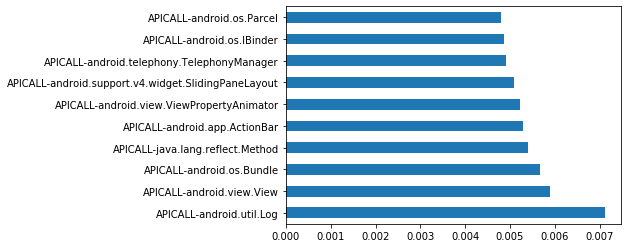

In [0]:
#feature_list = [df_activities, df_api_calls, df_opcodes, df_permissions, df_receivers, df_services, df_system]

feat_importances = pd.Series(rfc_models[1].best_estimator_.feature_importances_, index=df_api_calls.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

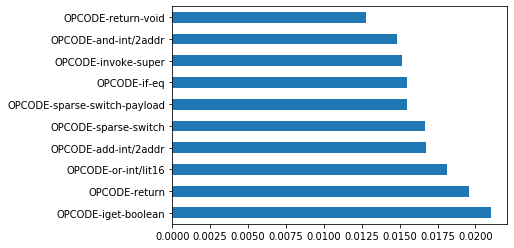

In [0]:
feat_importances = pd.Series(rfc_models[2].best_estimator_.feature_importances_, index=df_opcodes.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

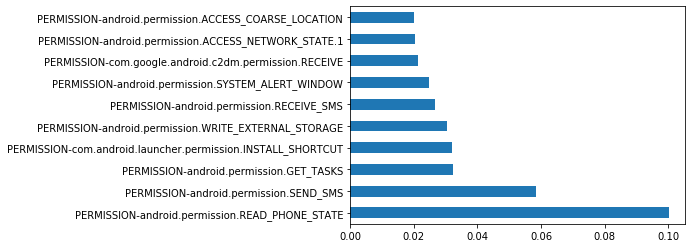

In [0]:
feat_importances = pd.Series(rfc_models[3].best_estimator_.feature_importances_, index=df_permissions.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

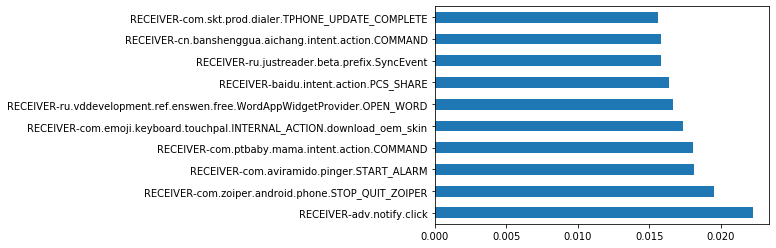

In [0]:
feat_importances = pd.Series(rfc_models[4].best_estimator_.feature_importances_, index=df_receivers.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

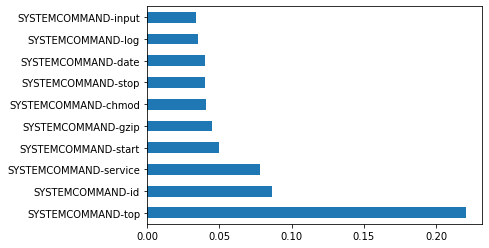

In [0]:
feat_importances = pd.Series(rfc_models[6].best_estimator_.feature_importances_, index=df_system.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

LightGBM model

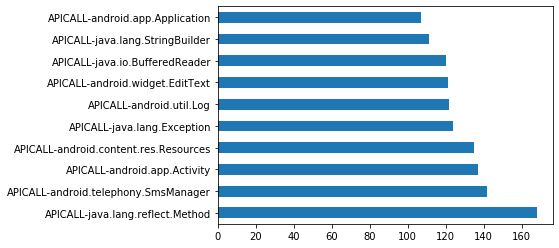

In [0]:
#feature_list = [df_activities, df_api_calls, df_opcodes, df_permissions, df_receivers, df_services, df_system]

feat_importances = pd.Series(lgbm_models[1].best_estimator_.feature_importances_, index=df_api_calls.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

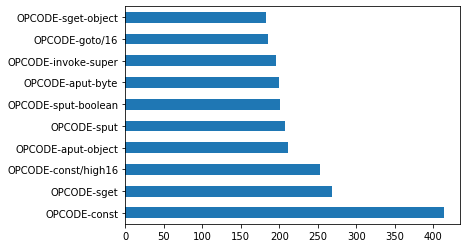

In [0]:
feat_importances = pd.Series(lgbm_models[2].best_estimator_.feature_importances_, index=df_opcodes.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

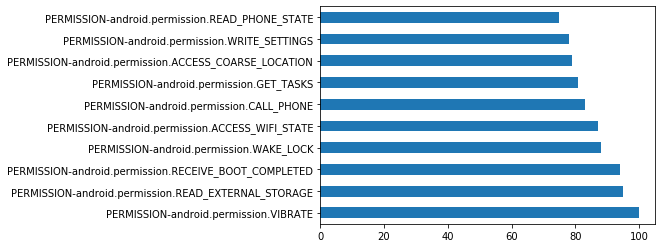

In [0]:
feat_importances = pd.Series(lgbm_models[3].best_estimator_.feature_importances_, index=df_permissions.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

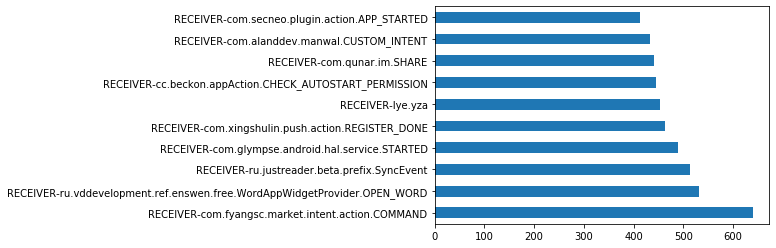

In [0]:
feat_importances = pd.Series(lgbm_models[4].best_estimator_.feature_importances_, index=df_receivers.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')

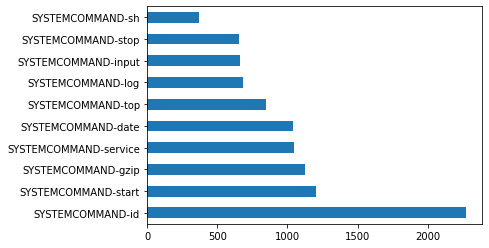

In [0]:
feat_importances = pd.Series(lgbm_models[6].best_estimator_.feature_importances_, index=df_system.drop(columns="label").columns)
feat_importances.nlargest(10).plot(kind='barh')